In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="data/product_reviews_balanced_1MF.csv"

In [3]:
df=pd.read_csv(path)
df.head()

,review,sentiment
0,"Pretty good product, met my expectations.",Good
1,Works well. I'm happy with it.,Good
2,Not good. Poor build quality.,Bad
3,Great build and design. Excellent value.,Excellent
4,Great build and design. Excellent value.,Excellent


In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### Cleaning

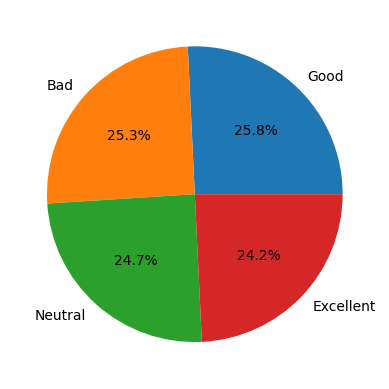

In [7]:
plt.pie(x = df['sentiment'].value_counts(), labels = df['sentiment'].value_counts().index, autopct = '%1.1f%%')
plt.show()

In [8]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [9]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrshr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrshr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrshr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mrshr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into text
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [11]:
df["clean_review"] = df["review"].apply(clean_text)

In [12]:
df['clean_review'].head()

0    pretty good product met expectation
1                     work well im happy
2                good poor build quality
3     great build design excellent value
4     great build design excellent value
Name: clean_review, dtype: object

In [13]:
X=df['clean_review']
y=df['sentiment']

In [14]:
# Vectorize text
tfdif = TfidfVectorizer()
X = tfdif.fit_transform(X)

In [15]:
X=X.toarray()

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00      5014
   Excellent       1.00      1.00      1.00      4894
        Good       1.00      1.00      1.00      5120
     Neutral       1.00      1.00      1.00      4973

    accuracy                           1.00     20001
   macro avg       1.00      1.00      1.00     20001
weighted avg       1.00      1.00      1.00     20001



In [18]:
model.predict(tfdif.transform(["100% accurate"]))

array(['Good'], dtype='<U9')

In [19]:
# Save the trained model and vectorizer using joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfdif, 'vectorizer.pkl')

print("Model saved successfully!")
print("Files saved:")
print("- sentiment_model.pkl")
print("- vectorizer.pkl")


Model saved successfully!
Files saved:
- sentiment_model.pkl
- vectorizer.pkl
